In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
import re


In [5]:
def bar_plot_results(results,  title_column1: str, x_axis : str , y_axis : str, z_axis : str, width=0.25, show= True, save_path=None):
    unique_t1 = set(map(str,results[title_column1]))
    # Tasks
    unique_x_axis = set(map(str,results[x_axis]))
    #acc
    unique_y_axis = set(map(str,results[y_axis]))
    # Model
    unique_z_axis = set(map(str,results[z_axis]))

    print('t1-axis: ', unique_t1)
    print('x-axis: ', unique_x_axis)
    print('y-axis: ', unique_y_axis)
    print('z-axis: ', unique_z_axis)
    colors = ['r','b', 'g', 'c', 'm', 'y', 'k', 'w']
    N = len(unique_x_axis)
    ind = np.arange(N) 

    print('N:' , N)
    # 3 dimensions:
    # `Task/Dataset`
    # 'Retriever'
    # 'Model'
    # Choose 2 to display 
    for t1 in unique_t1:
            print('t1: ', t1)
            plt.figure()
            vals = []
            stds = []
            bars = []
            for i, z in enumerate( unique_z_axis):
                # for x in unique_x_axis:
                    xvals = list(results.loc[(results[title_column1] == t1) & (results[z_axis] == z)]['accuracy_mean'])
                    xstd = list(results.loc[(results[title_column1] == t1)  & (results[z_axis] == z)]['accuracy_std'])
                    print(xvals)
                    print(xstd)
                    bar = plt.bar(ind+ width*i, xvals, width, color = colors[i])
                    bars.append(bar)
            

            plt.xlabel(x_axis)
            plt.ylabel(y_axis)
            plt.title(title_column1 +": " +str(t1) ) # + " and " + title_column2+  ": " + str(t2) )
            
            plt.xticks(ind+width, list(unique_x_axis))
            plt.legend( bars, unique_z_axis )

            if save_path is not None:
                        plt.savefig(save_path + 'barplot_' + t1 + '_' + x_axis + '_' + z_axis + '.png')
            plt.show()


def line_plot_results(results,  title_column1, title_column2, title_column3, x_axis : str , y_axis : str, z_axis : str, save_path=None):
    unique_t1 = set(map(str,results[title_column1]))
    unique_t2 = set(map(str,results[title_column2]))
    # unique_t3 = set(map(str,results[title_column3]))
    # Test_size
    unique_x_axis = set(results[x_axis])
    # acc
    unique_y_axis = set(results[y_axis])
    # retriever
    unique_z_axis = set(results[z_axis])

    print('t1-axis: ', unique_t1)
    print('x-axis: ', unique_x_axis)
    print('y-axis: ', unique_y_axis)
    print('z-axis: ', unique_z_axis)
    colors = ['r','b', 'g', 'c', 'm', 'y', 'k', 'w']
    N = len(unique_x_axis)
    ind = np.arange(N) 

    print('N:' , N)
    # 5 possible dimensions:
    # `Task/Dataset`
    # 'Retriever'
    # 'Model'
    # 'Test_size'
    # 'num_ice'

    # Choose 2 to display 
    for t1 in unique_t1:
        for t2 in unique_t2:
            # for t3 in unique_t3:
                plt.figure()
                for i,z in enumerate(unique_z_axis):
                    # xvals  = list(set(results.loc[(results[title_column1] == t1) & (results[title_column2] == t2) & (results[z_axis] == z)][x_axis]))
                    vals =  list(results.loc[(results[title_column1] == t1) & (results[title_column2] == t2)  & (results[z_axis] == z)]['accuracy_mean'])
                    std = list(results.loc[(results[title_column1] == t1)  & (results[title_column2] == t2)  & (results[z_axis] == z)]['accuracy_std'])
                    xvals = list(results.loc[(results[title_column1] == t1)  & (results[title_column2] == t2)  & (results[z_axis] == z)][x_axis])
                    plt.plot(xvals, vals , color = colors[i])


                plt.xlabel(x_axis)
                plt.ylabel(y_axis)
                plt.title(title_column1 +": " + str(t1) + ", " + title_column2 +  ": " + str(t2) ) #+ " and " + title_column3+  ": " + str(t3) )
                
                plt.legend(unique_z_axis )
                plt.show()
                if save_path is not None:
                            plt.savefig(save_path + 'lineplot_' + t1 + '_' + t2 + '_'+ x_axis + '_' + z_axis + '.png')

                


In [74]:
import os
import pandas as pd
print(os.listdir('data'))
df_results = pd.concat([ pd.read_csv('data/'+ f) for f in os.listdir('data') if f.endswith('.csv')])
# display(df_results)
df_results['task_dataset'] = df_results['task_dataset'].fillna('qa_ob')
df_results.loc[df_results['retriever'].isin(['qkp']), 'retriever'] = 'cdt'
df_results.to_csv('all_results.csv', index=False)

print(df_results.columns)
for c in ['model', 'test_size', 'ice_num', 'task',
       'dataset', 'retriever', 'task_dataset']:
    print(c, df_results[c].unique())


task_datasets = ['qa_com', 'qa_ob', 'ss_rotten_tomatoes', 'ss_gs']
models = ['bigscience/bloom-560m', 'gpt3', 'google/flan-t5-small']
retrievers = ['cdt', 'random', 'topk', 'bm25']

['bloom560_qa_ice_1_2.csv', 'bloom560_qa_ice_4_10.csv', 'bloom560_ss_1_2.csv', 'bloom560_ss_4_10.csv', 'flan_qa.csv', 'flan_sa.csv', 'gpt3-ice-4-10.csv', 'gpt3-ice-4-10_sentiment.csv', 'gpt3-qa.csv', 'gpt3.csv']
Index(['model', 'test_size', 'ice_num', 'task', 'dataset', 'retriever',
       'accuracy_mean', 'accuracy_std', 'predictions', 'inputs', 'outputs',
       'predictions_parsed', 'task_dataset', 'Unnamed: 0'],
      dtype='object')
model ['bigscience/bloom-560m' 'google/flan-t5-small' 'gpt3']
test_size [20]
ice_num [ 1  2  4 10]
task ['question-answering' 'sentiment-analysis']
dataset ['commonsense_qa' 'openbookqa' 'rotten_tomatoes' 'gpt3mix/sst2']
retriever ['cdt' 'random' 'topk' 'bm25']
task_dataset ['qa_com' 'qa_ob' 'ss_rotten_tomatoes' 'ss_gs']


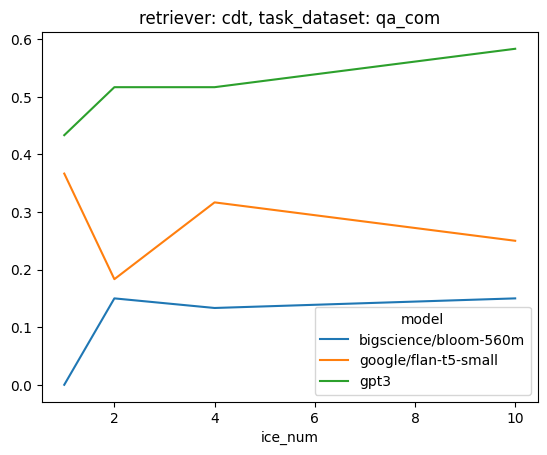

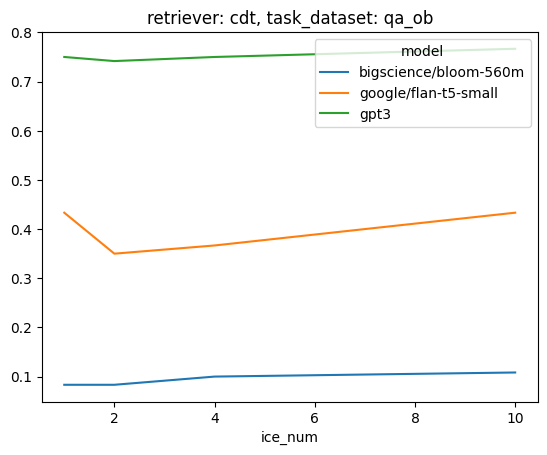

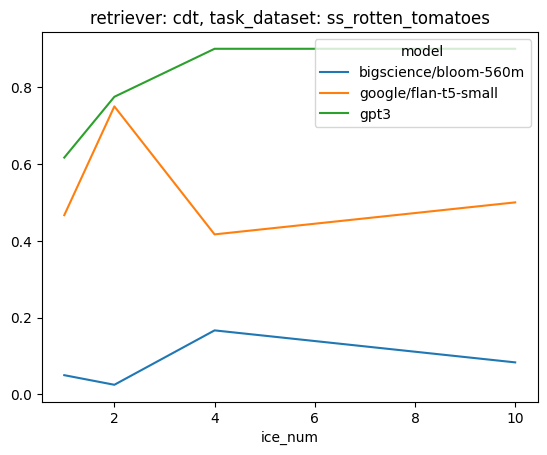

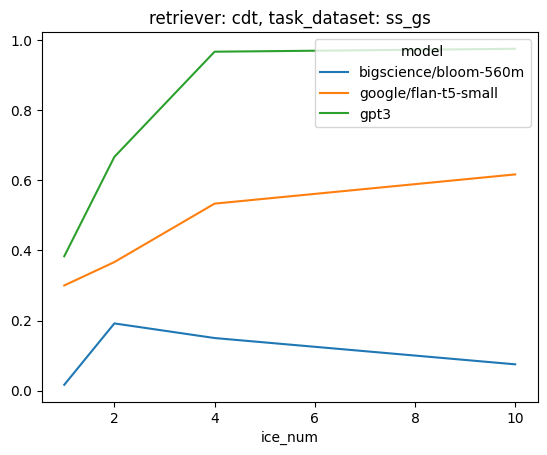

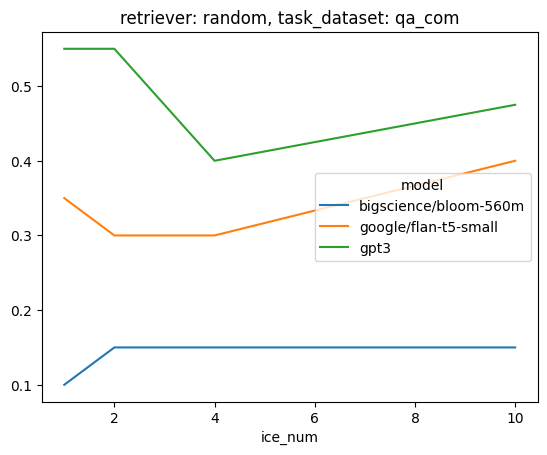

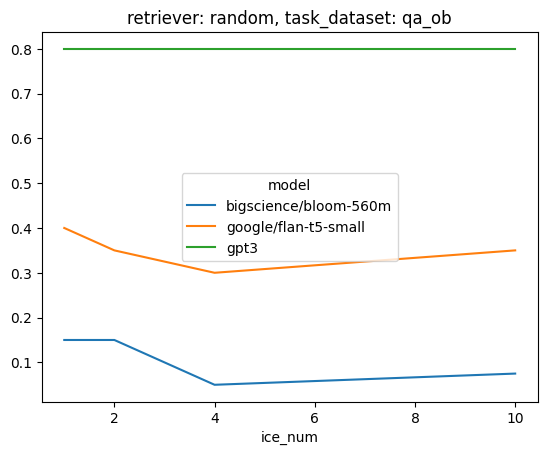

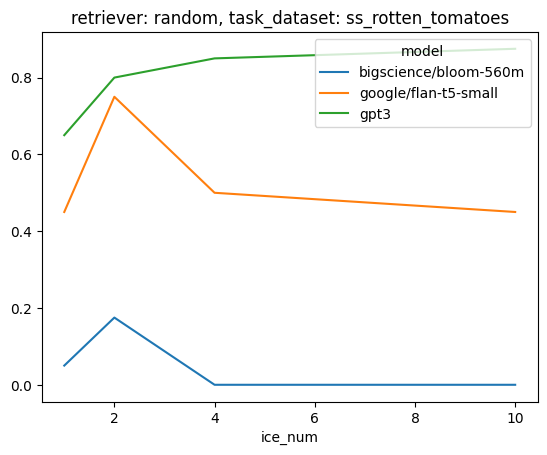

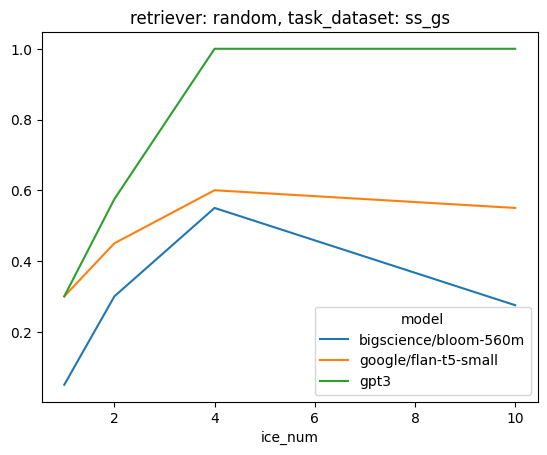

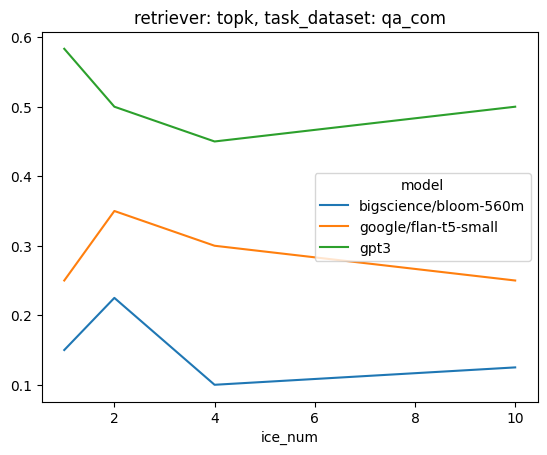

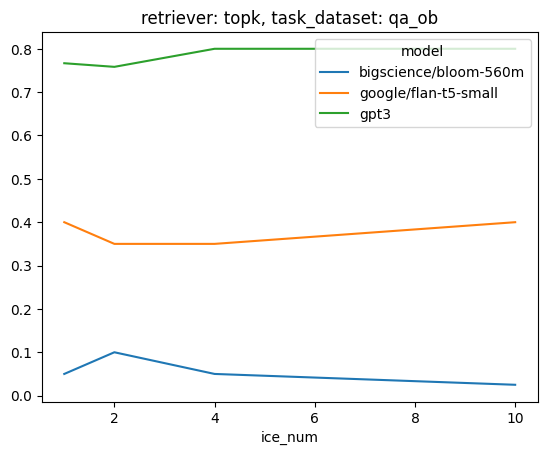

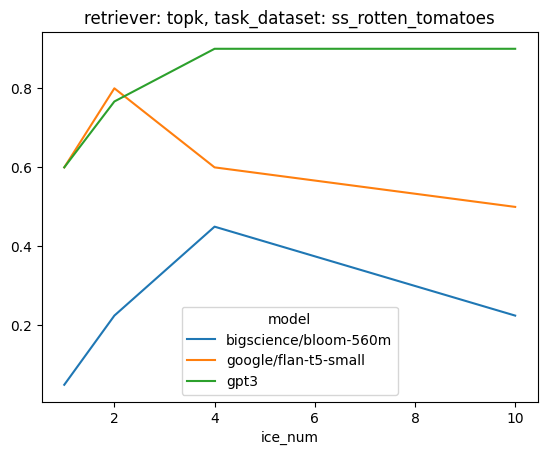

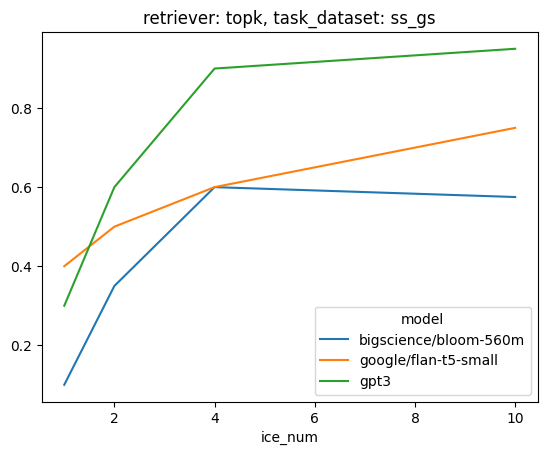

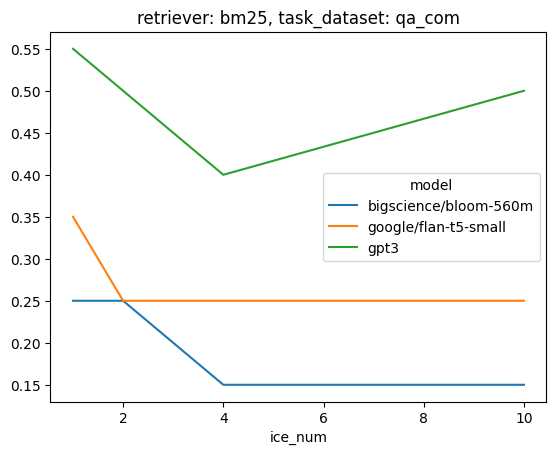

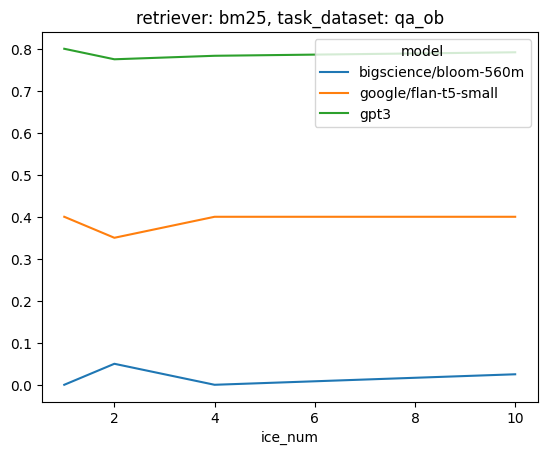

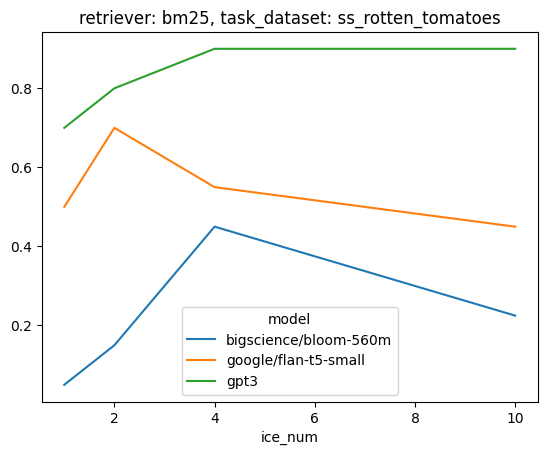

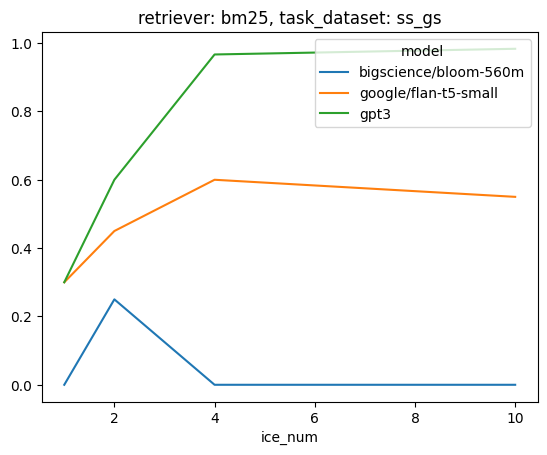

In [69]:
t1_name = 'retriever'
t2_name = 'task_dataset'
column_name = 'model'
for t1 in retrievers:
    for t2 in task_datasets:
                    bar_df = df_results.loc[(df_results[t1_name] ==t1) & (df_results[t2_name] ==t2)]
                    # display(bar_df)
                    dfp = bar_df.pivot(index='ice_num', columns=column_name, values='accuracy_mean')
                    # yerr = bar_df.pivot(index='ice_num', columns=column_name, values='accuracy_std')
                    res = dfp.plot( title=t1_name.replace("/", "_") + ': ' + str(t1) +', '+ t2_name+ ': '+ t2.replace("/", "_")).get_figure()
                    res.savefig('images/lineplots/'+ t1_name +"_"+ t2_name + '/lineplot_model_' + t1.replace("/", "_") + '_' + str(t1).replace('/', '_') +'_'+ t2.replace("/", "_") +'.png')
        

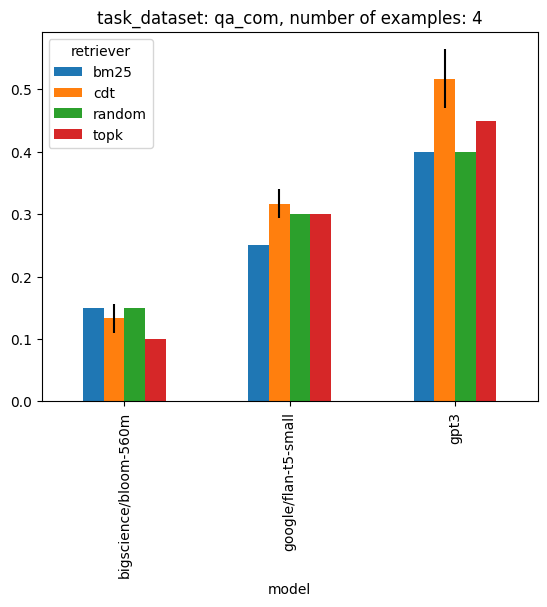

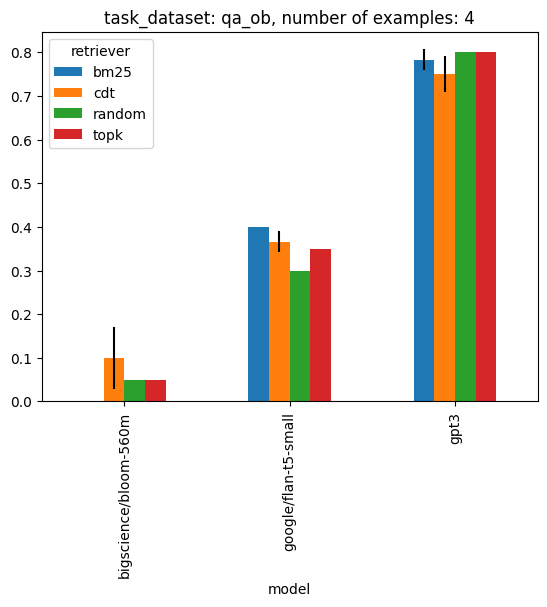

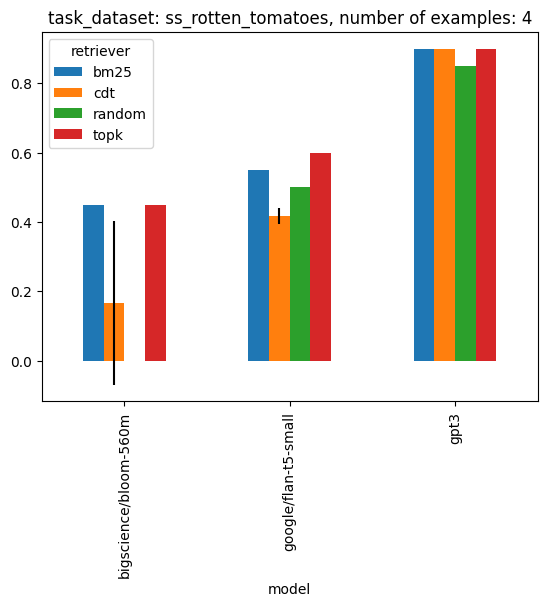

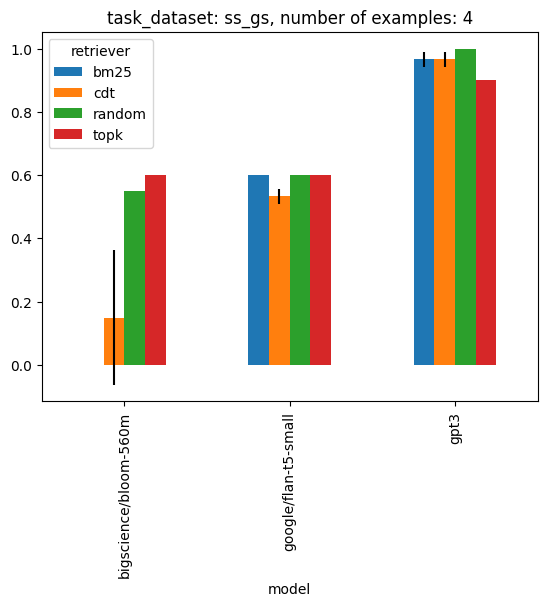

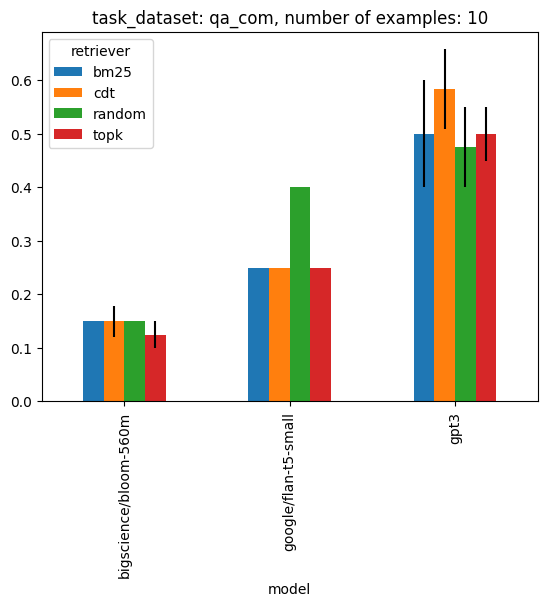

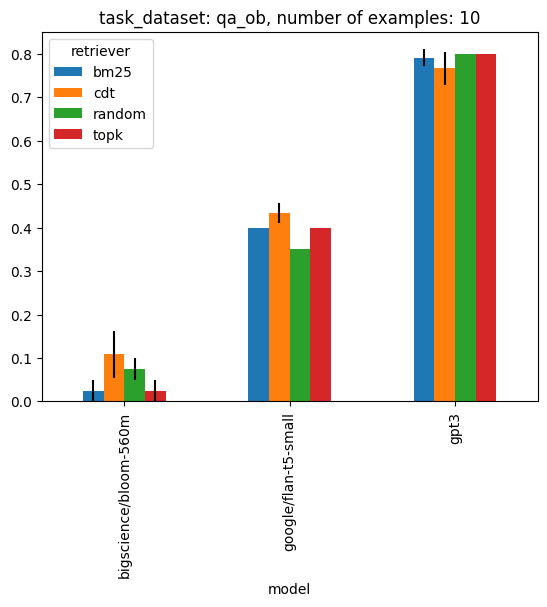

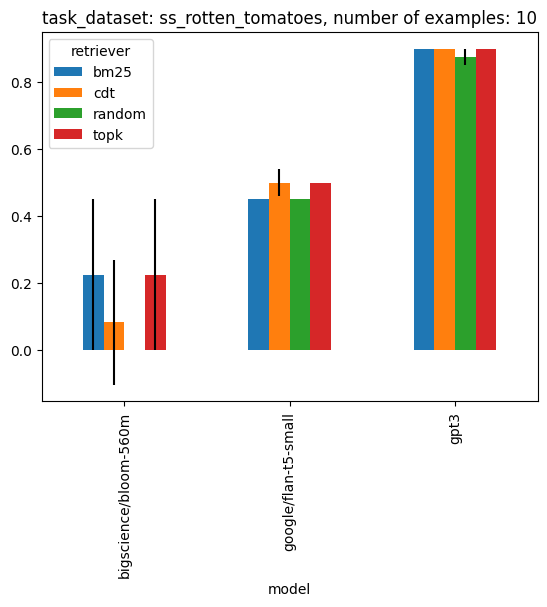

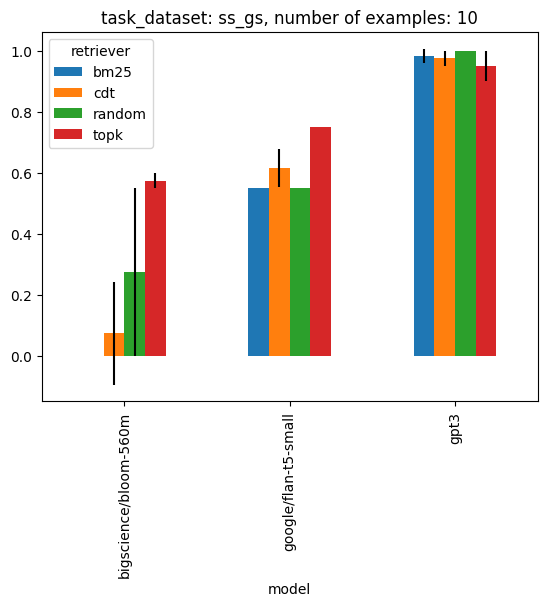

In [73]:
import numpy as np
import matplotlib.pyplot as plt
# SELECT constant test size and train size to plot
t_name = 'task_dataset'
index_name = 'model'
column_name = 'retriever'
for j in [4,10]:
    for t in task_datasets:
                    bar_df = df_results.loc[(df_results[t_name] ==t)  & (df_results['ice_num'] == j)]
                    dfp = bar_df.pivot(index=index_name, columns=column_name, values='accuracy_mean')
                    yerr = bar_df.pivot(index=index_name, columns=column_name, values='accuracy_std')
                    res =  dfp.plot(kind='bar', yerr=yerr, title=t_name +': ' + str(t) + ', number of examples: ' + str(j)).get_figure()
                    res.savefig('images/barplots/columns_retriever/barplot_model_' + str(t).replace("/", "_") + '_num_ice_' + str(j)+'.png')


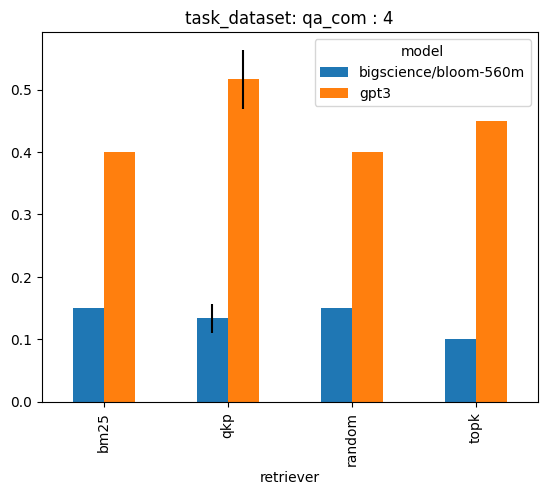

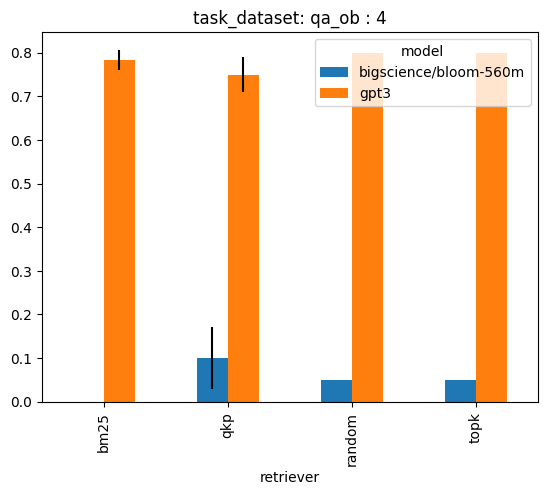

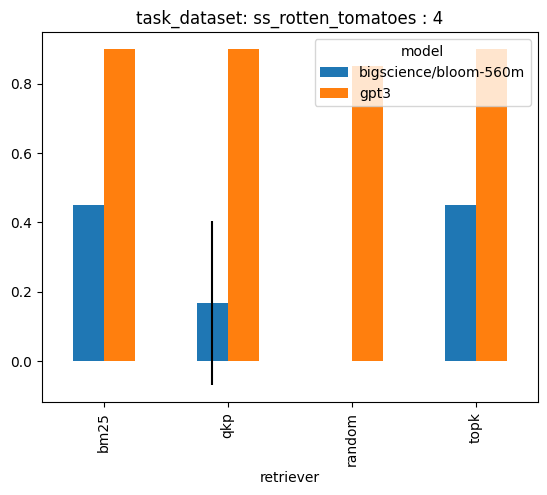

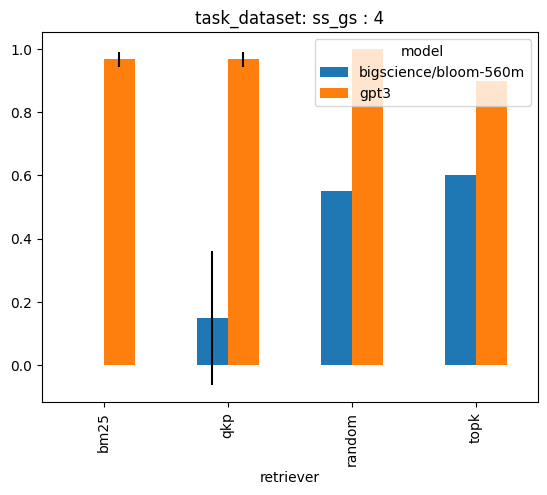

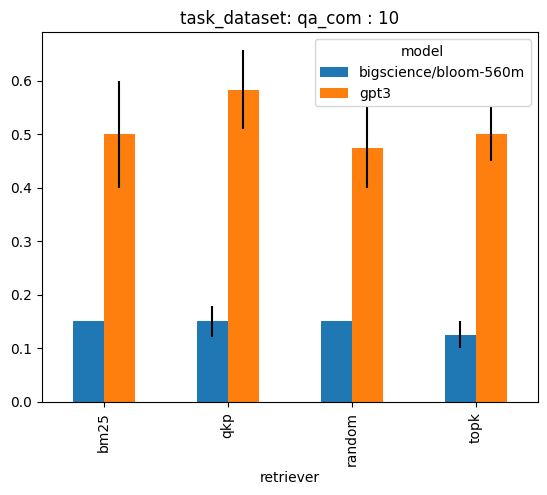

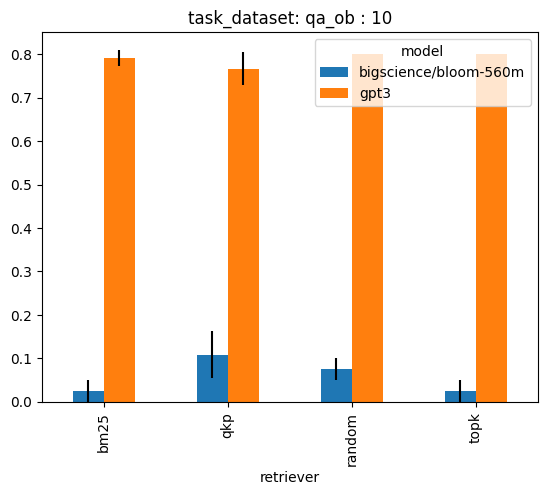

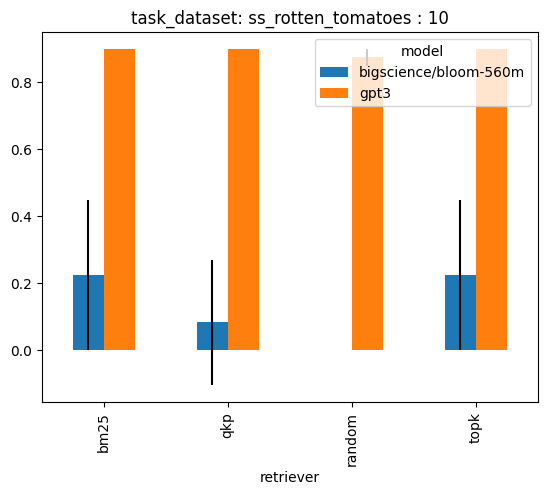

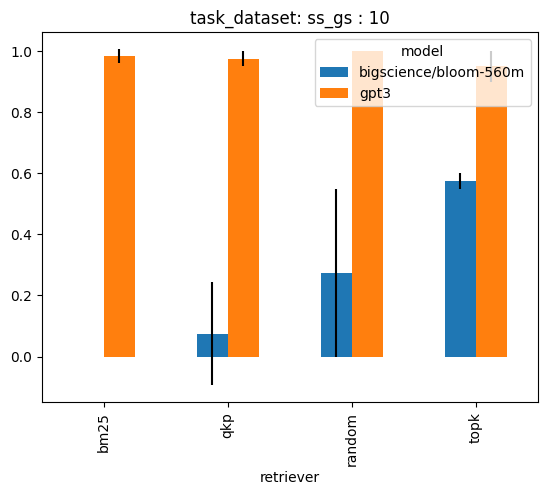

In [15]:
for i in [20]:
            for j in [4,10]:
                for t in task_datasets:
                    bar_df = df_results.loc[(df_results['task_dataset'] ==t) & (df_results['test_size'] ==i) & (df_results['ice_num'] == j)]
                    dfp = bar_df.pivot(index='retriever', columns='model', values='accuracy_mean')
                    yerr = bar_df.pivot(index='retriever', columns='model', values='accuracy_std')
                    res = dfp.plot(kind='bar', yerr=yerr, title='task_dataset: ' + str(t) + ' : ' + str(j)).get_figure()
                    res.savefig('images/'+ 'barplot_model_' + str(t).replace("/", "_") + '_' + str(j)+'.png')